<a href="https://colab.research.google.com/github/tamer-elkoT/Employee-Churn-Analysis-/blob/main/Hyperparameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data & Models

In [1]:
import joblib
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X_train = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/NTI/Projects/Employee TurnOver/DataSet/X_train_scaled.csv")
X_test = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/NTI/Projects/Employee TurnOver/DataSet/X_test_scaled.csv")
y_train = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/NTI/Projects/Employee TurnOver/DataSet/y_train_resampled.csv")
y_test = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/NTI/Projects/Employee TurnOver/DataSet/y_test.csv")

# Define parameteres Grid for Random Forest

In [3]:
param_grid_rf = {
    "criterion":["gini","entropy","log_loss"],
    "max_depth":[50,60,70],
    "min_samples_split":[1,2],
    "max_features":["auto","sqrt","log2"],
    "n_estimators":[150,200,250]
}

In [4]:
rf = RandomForestClassifier(random_state=42)

In [5]:
random_search_rf = RandomizedSearchCV(
    estimator = rf,
    param_distributions=param_grid_rf,
    n_iter=10,
    cv=5,
    scoring="f1",
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [6]:
random_search_rf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_p

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [50, 60, 70],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [1, 2],
                                        'n_estimators': [150, 200, 250]},
                   random_state=42, scoring='f1', verbose=2)

In [7]:
random_search_rf.best_params_

{'n_estimators': 250,
 'min_samples_split': 2,
 'max_features': 'sqrt',
 'max_depth': 70,
 'criterion': 'entropy'}

In [8]:
best_rf = random_search_rf.best_estimator_
best_rf

RandomForestClassifier(criterion='entropy', max_depth=70, n_estimators=250,
                       random_state=42)

In [9]:
random_search_rf.best_score_ # np.float64(0.9826622334553379)
#0.9835138566840816

np.float64(0.9836855223158892)

# Define Parameters Gird for XG Boost

In [10]:
from xgboost import XGBClassifier
param_grid_xgb = {
    "n_estimator":[300,350,400],
    "max_depth":[3,5,10],
    "learning_rate":[0.2,0.3,0.4],
    "subsample":[0.6,0.8,1.0],
    "colsample_bytree":[0.6,0.8,1.0],
    "gamma":[0,0.1,0.2],
    "scale_pos_weight":[1,3,5]
}

In [11]:
xgb = XGBClassifier(use_label_encoded= False, eval_metric = "logloss")

In [12]:
random_search_xgb = RandomizedSearchCV(
    estimator = xgb,
    param_distributions = param_grid_xgb,
    n_iter=10,
    cv=5,
    scoring="f1",
    verbose=2,
    n_jobs=-1

)

In [13]:
random_search_xgb.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:46:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimator", "use_label_encoded" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.2, 0.3, 0.4],
                                        'max_depth': [3, 5, 10],
                                        'n_estimator': [300, 350, 400],
                                        'scale_pos_weight': [1, 3, 5],
                                        'subsample': [0.6, 0.8, 1.0]},
                   scoring='f1', verbose=2)

In [14]:
random_search_xgb.best_params_

{'subsample': 1.0,
 'scale_pos_weight': 5,
 'n_estimator': 300,
 'max_depth': 10,
 'learning_rate': 0.3,
 'gamma': 0,
 'colsample_bytree': 0.8}

In [15]:
random_search_xgb.best_score_

np.float64(0.9856281450935901)

# Evaluate Best Models

In [16]:
best_rf = random_search_rf.best_estimator_
best_xgb = random_search_xgb.best_estimator_

# Evaluate on test data
print("Random Forest Report:")
print(classification_report(y_test, best_rf.predict(X_test)))

print("XGBoost Report:")
print(classification_report(y_test, best_xgb.predict(X_test)))


Random Forest Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       0.99      0.97      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000

XGBoost Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.96      0.97      0.96       714

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



# Save Best Models

In [ ]:
joblib.dump(best_rf, "/content/drive/MyDrive/Colab Notebooks/NTI/Projects/Employee TurnOver/Models/best_rf.pkl")
joblib.dump(best_xgb,"/content/drive/MyDrive/Colab Notebooks/NTI/Projects/Employee TurnOver/Models/best_xgboost.pkl")

['/content/drive/MyDrive/Colab Notebooks/NTI/Projects/Employee TurnOver/Models/best_xgboost.pkl']

# Load the pre-trained Models

In [20]:
rf_model = joblib.load("/content/drive/MyDrive/Colab Notebooks/NTI/Projects/Employee TurnOver/Models/Random_Forest_model.pkl")
xgb_model = joblib.load("/content/drive/MyDrive/Colab Notebooks/NTI/Projects/Employee TurnOver/Models/XGBoost_model (1).pkl")

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/lib/python3.11/pickle.py:1718: UserWarning: [15:02:30] WARNING: /workspace/src/collective/../data/../common/error_msg.h:82: If you are loading a serialized model (like pickle in Python, RDS in 

# Evaluate the models With Cross-Validation

In [34]:
from sklearn.model_selection import cross_val_score
cv = 5
scoring = "f1"

# tuned Models
scores_best_rf = cross_val_score(best_rf,X_train,y_train,cv=cv,scoring=scoring)
scores_best_xgb = cross_val_score(best_xgb,X_train,y_train,cv=cv,scoring=scoring)

# Pre-trained Models
scores_rf_model = cross_val_score(rf_model,X_train,y_train,cv=cv,scoring=scoring)

# Re-train the XGBoost model with the same parameters
xgb_model_retrained = XGBClassifier(use_label_encoder=False,
                                     eval_metric='logloss',
                                     n_estimators=300,
                                     max_depth=10,
                                     learning_rate=0.3,
                                     gamma=0,
                                     colsample_bytree=0.8,
                                     subsample=1.0,
                                     scale_pos_weight=5)

scores_xgb_model = cross_val_score(xgb_model_retrained,X_train,y_train,cv=cv,scoring=scoring)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

In [35]:
scores_best_xgb

array([0.97854785, 0.98716198, 0.98665941, 0.98857454, 0.98719695])

In [39]:
Scores = {
    "Pre-trained Random Forest":np.mean(scores_rf_model),
    "Pre-trained XGBoost":np.mean(scores_xgb_model),
    "Tuned Random Forest":np.mean(scores_best_rf),
    "Tuned XGBoost":np.mean(scores_best_xgb)
}



In [40]:
model_names = list(Scores.keys())
model_names

['Pre-trained Random Forest',
 'Pre-trained XGBoost',
 'Tuned Random Forest',
 'Tuned XGBoost']

In [42]:
f1_scores = list(Scores.values())
f1_scores

[np.float64(0.9824055896510447),
 np.float64(0.9854495031085351),
 np.float64(0.9836855223158892),
 np.float64(0.9856281450935901)]

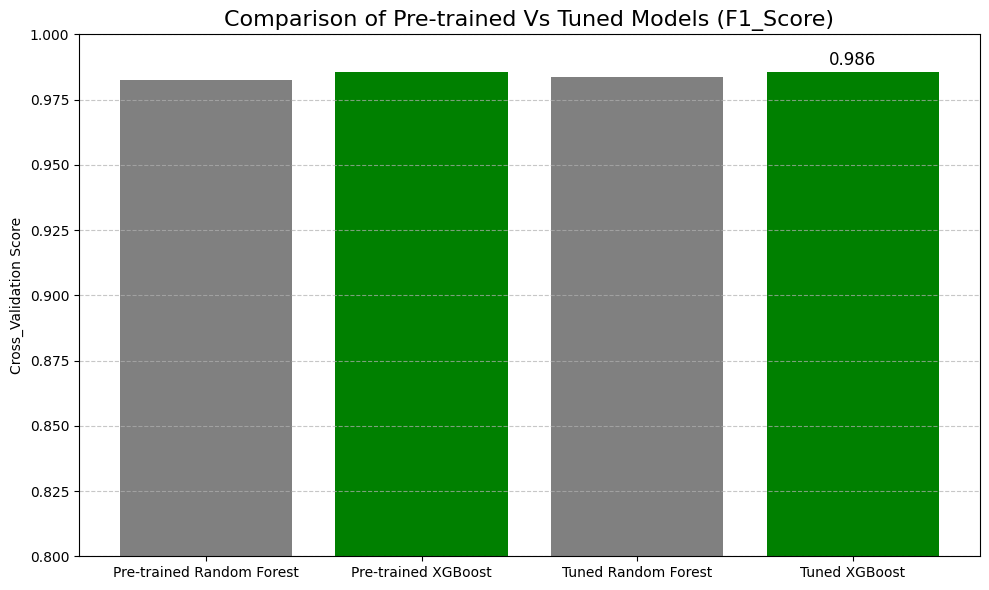

In [45]:
plt.figure(figsize=(10,6))
bars = plt.bar(model_names,f1_scores, color = ["gray","green","gray","green"])
plt.title("Comparison of Pre-trained Vs Tuned Models (F1_Score)",fontsize=16)
plt.ylabel("Cross_Validation Score")
plt.ylim(0.8,1.0)


height = bar.get_height()
plt.annotate(f"{height:.3f}",xy = (bar.get_x()+ bar.get_width() / 2,height),
              xytext=(0,5), textcoords="offset points",ha = "center", fontsize=12)

plt.tight_layout()
plt.grid(axis="y",linestyle="--",alpha=0.7)
plt.show()

# Find the Best Model

In [46]:
best_model_name = max(Scores,key=Scores.get)
best_model_name

'Tuned XGBoost'

#Tuned XGBoost Is The Best Model

# Evaluate All models on the Same Test Set

In [17]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report


In [18]:
def evaluate_model(model,X_test,y_test):
  y_pred = model.predict(X_test)

  print("Accuracy:", accuracy_score(y_test,y_pred))
  print("Precision:", precision_score(y_test,y_pred))
  print("Recall:", recall_score(y_test,y_pred))
  print("F1 Score:", f1_score(y_test,y_pred))
  print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
  print("Classification Report:\n",classification_report(y_test,y_pred))




In [21]:

print("Basline Random Forest:")
evaluate_model(rf_model,X_test,y_test)

print("\nTuned Random Forest:")
evaluate_model(best_rf,X_test,y_test)


Basline Random Forest:
Accuracy: 0.9896666666666667
Precision: 0.9885550786838341
Recall: 0.9677871148459384
F1 Score: 0.9780608634111819
Confusion Matrix:
 [[2278    8]
 [  23  691]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       0.99      0.97      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000


Tuned Random Forest:
Accuracy: 0.9893333333333333
Precision: 0.9885386819484241
Recall: 0.9663865546218487
F1 Score: 0.9773371104815864
Confusion Matrix:
 [[2278    8]
 [  24  690]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       0.99      0.97      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0

In [23]:
print("\nBaseline XGBoost:")
evaluate_model(xgb_model['model'], X_test, y_test)

print("\nTuned XGBoost:")
evaluate_model(best_xgb, X_test, y_test)


Baseline XGBoost:
Accuracy: 0.982
Precision: 0.9634831460674157
Recall: 0.9607843137254902
F1 Score: 0.9621318373071529
Confusion Matrix:
 [[2260   26]
 [  28  686]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.96      0.96      0.96       714

    accuracy                           0.98      3000
   macro avg       0.98      0.97      0.98      3000
weighted avg       0.98      0.98      0.98      3000


Tuned XGBoost:
Accuracy: 0.983
Precision: 0.9597780859916782
Recall: 0.969187675070028
F1 Score: 0.9644599303135889
Confusion Matrix:
 [[2257   29]
 [  22  692]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.96      0.97      0.96       714

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98

# Save the Best Model for Deployment

In [47]:
joblib.dump(best_xgb,"/content/drive/MyDrive/Colab Notebooks/NTI/Projects/Employee TurnOver/Models/best_xgb_model_for_deployment.pkl")

['/content/drive/MyDrive/Colab Notebooks/NTI/Projects/Employee TurnOver/Models/best_xgb_model_for_deployment.pkl']